# Regional Analysis of Gasoline Prices

## Objective
This notebook explores regional variations and comparisons of gasoline prices across different types: Regular, Midgrade, and Premium. The goal is to understand how prices differ by region, particularly between the East Coast and West Coast, and how these differences evolve over time.

## Data Loading and Preprocessing
- **Data Sources**: Separate CSV files for Regular, Midgrade, and Premium gasoline prices.
- **Preprocessing Steps**:
  - Load and clean data from CSV files.
  - Ensure consistent formatting and data type conversion for analysis.

## Analysis Overview
- **Regional Coverage**: Focus on East Coast vs. West Coast comparisons.
- **Fuel Types Analyzed**: Regular, Midgrade, and Premium.
- **Visualization**: Time series plots with zoomed-in views and regional comparisons to visualize differences in price trends.

## Results
- Detailed visual representations of regional price trends.
- Comparative analysis between East Coast and West Coast gasoline prices.

## Conclusion
This analysis provides insights into regional price disparities, enhancing understanding of market dynamics and aiding stakeholders in making informed decisions.

## Next Steps
- Incorporate additional data points to extend the timeline or include more regions.
- Analyze potential causes of regional price disparities such as supply chain differences, tax policies, or demand fluctuations.


C:\Users\tbfau\AppData\Local\Temp\ipykernel_20276\2761448358.py:23: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
C:\Users\tbfau\AppData\Local\Temp\ipykernel_20276\2761448358.py:23: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
C:\Users\tbfau\AppData\Local\Temp\ipykernel_20276\2761448358.py:23: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'], errors='coerce')


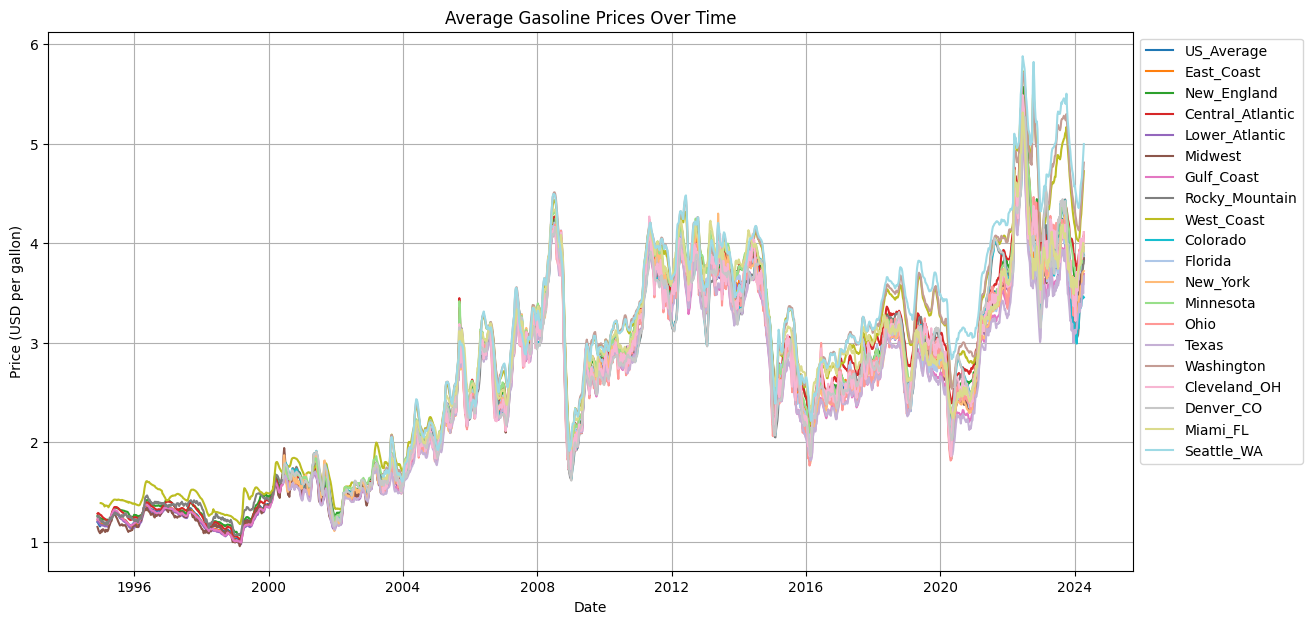

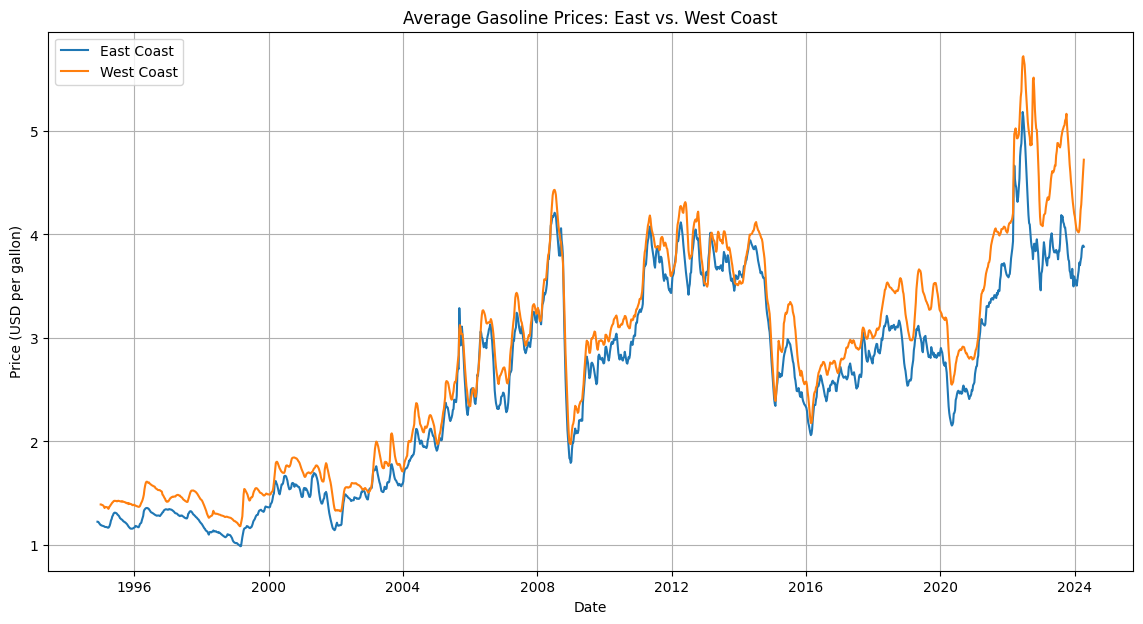

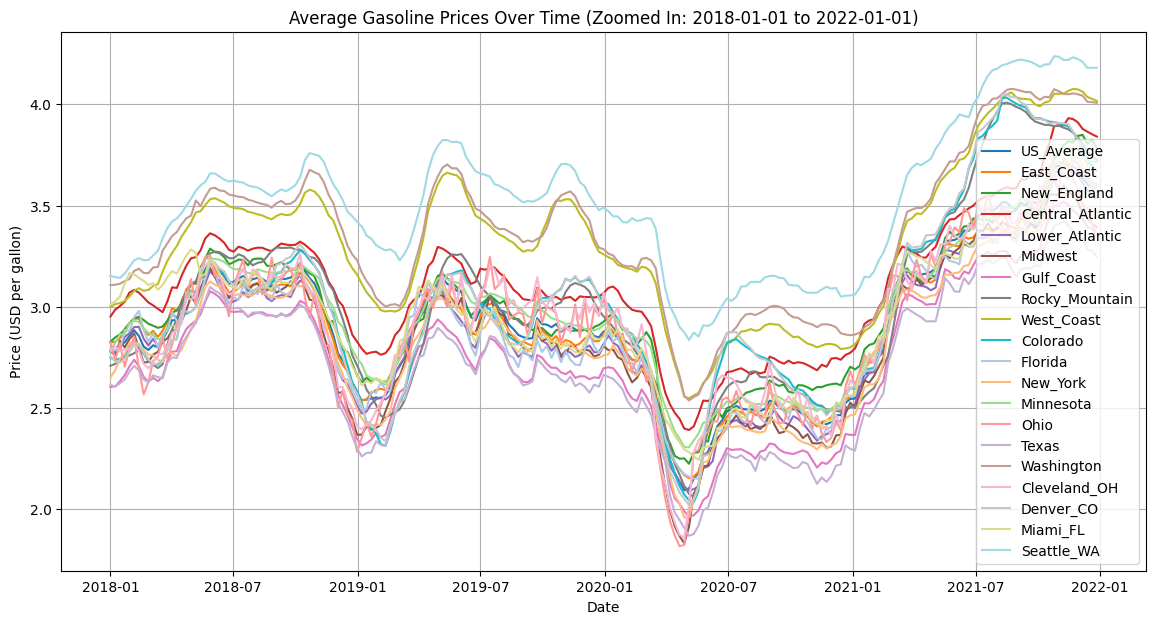

In [10]:


import pandas as pd
import matplotlib.pyplot as plt

# Color palette for better visibility
colors = [
    "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd",
    "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf",
    "#aec7e8", "#ffbb78", "#98df8a", "#ff9896", "#c5b0d5",
    "#c49c94", "#f7b6d2", "#c7c7c7", "#dbdb8d", "#9edae5"
]

# Function to load and clean data
def load_and_clean_data(filepath):
    # Read the data, skipping unnecessary header information
    data = pd.read_csv(filepath, skiprows=1)
    # Define the column names according to the structure of your CSV
    column_names = ["Date", "US_Average", "East_Coast", "New_England", "Central_Atlantic", "Lower_Atlantic",
                    "Midwest", "Gulf_Coast", "Rocky_Mountain", "West_Coast", "Colorado", "Florida", 
                    "New_York", "Minnesota", "Ohio", "Texas", "Washington", "Cleveland_OH", "Denver_CO", 
                    "Miami_FL", "Seattle_WA", "Empty "]
    data.columns = column_names
    # Clean the data
    data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
    # Convert all relevant columns to numeric, handling non-numeric entries
    for col in data.columns[1:]:
        data[col] = pd.to_numeric(data[col], errors='coerce')
    return data

# Function to plot data with a focus on East vs. West Coast
def plot_fuel_data_east_west(df, title):
    plt.figure(figsize=(14, 7))
    plt.plot(df['Date'], df['East_Coast'], label='East Coast', color='#1f77b4')
    plt.plot(df['Date'], df['West_Coast'], label='West Coast', color='#ff7f0e')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price (USD per gallon)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Function to plot zoomed-in data for a specific date range
def plot_zoomed_data(df, title, start_date, end_date):
    plt.figure(figsize=(14, 7))
    mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
    zoomed_data = df.loc[mask]
    for idx, column in enumerate(zoomed_data.columns[1:]):
        if zoomed_data[column].notna().any():  # Plot only if there are non-NaN values
            plt.plot(zoomed_data['Date'], zoomed_data[column], label=column, color=colors[idx % len(colors)])
    plt.title(title + " (Zoomed In: " + start_date + " to " + end_date + ")")
    plt.xlabel('Date')
    plt.ylabel('Price (USD per gallon)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plotting function
def plot_fuel_data(df, title):
    plt.figure(figsize=(14, 7))
    for idx, column in enumerate(df.columns[1:]):  # Skipping 'Date' column
        if df[column].notna().any():  # Plot only if there are non-NaN values
            plt.plot(df['Date'], df[column], label=column, color=colors[idx % len(colors)])
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price (USD per gallon)')
    plt.legend(loc='upper left', bbox_to_anchor=(1,1))  # Move the legend out of the plot
    plt.grid(True)
    plt.show()
# Load data
data_paths = ['Data\Data1_Regular_Conventional.csv', 
              'Data\Data4_Midgrade_Conventional.csv'
              ,'Data\Data7_Premuim_Conventional.csv']
datasets = [load_and_clean_data(path) for path in data_paths]

# Combine datasets by averaging prices
combined_data = datasets[0]
for data in datasets[1:]:
    combined_data = combined_data.merge(data, on='Date', suffixes=('', '_drop'))
    for col in combined_data.columns:
        if '_drop' in col:
            combined_data[col.replace('_drop', '')] = combined_data[[col.replace('_drop', ''), col]].mean(axis=1)
            combined_data.drop(col, axis=1, inplace=True)

# Plotting for general trends, East vs. West comparison, and zoomed view
plot_fuel_data(combined_data, "Average Gasoline Prices Over Time")
plot_fuel_data_east_west(combined_data, "Average Gasoline Prices: East vs. West Coast")
plot_zoomed_data(combined_data, "Average Gasoline Prices Over Time", "2018-01-01", "2022-01-01")